<a href="https://colab.research.google.com/github/Chelagat-Pauline-G/MORINGA-DATA-SCIENCE-CORE-PROJECTS/blob/master/WEEK_4_INDEPENDENT_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###WEEK 4 INDEPENDENT PROJECT

In [95]:
#IMPORTING THE LIBRARIES NEEDED
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import norm
from scipy import stats
import statistics
import math



In [36]:
#Loading and previewing the data
df=pd.read_csv('autolib_daily_events_postal_code.csv')
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [37]:
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


##CHECKING THE DATA

In [38]:
#Determining the nummber of rows and columns
df.shape

(16085, 13)

In [6]:
#Determining whether the column have the correct type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
#Checking the dataset details
df.describe()


,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
#Checking for null/missing values
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
#Checking for unique values
df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [ ]:
#Checking for duplicate
df.duplicated().value_counts()

False    16085
dtype: int64

##TIDYING UP THE DATASET

In [39]:
#Dropping the columns we dont need
df.drop(df.iloc[:, 7: ], axis=1, inplace=True)
df 

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117
...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10
16081,95880,6/16/2018,1440,5,weekend,19,19
16082,95880,6/17/2018,1440,6,weekend,33,35
16083,95880,6/18/2018,1440,0,weekday,11,14


In [61]:
#Droping the rows in the day type column that correspond to weekend 
df= df[df.day_type != 'weekend']
df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117
...,...,...,...,...,...,...,...
16078,95880,6/13/2018,1440,2,weekday,12,13
16079,95880,6/14/2018,1439,3,weekday,15,13
16080,95880,6/15/2018,1440,4,weekday,15,10
16083,95880,6/18/2018,1440,0,weekday,11,14


In [62]:
#Renaming the first column
df1 = df.rename(columns = {'Postal code': 'Postal_code'}, inplace = False)


In [63]:
df1['Postal_code']=df1['Postal_code'].astype(str)
df1

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117
...,...,...,...,...,...,...,...
16078,95880,6/13/2018,1440,2,weekday,12,13
16079,95880,6/14/2018,1439,3,weekday,15,13
16080,95880,6/15/2018,1440,4,weekday,15,10
16083,95880,6/18/2018,1440,0,weekday,11,14


In [64]:
#Finding how many outliers are there in the dataset
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print("*"*100)

print(((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False))

n_daily_data_points        1.0
dayOfWeek                  2.0
BlueCars_taken_sum       108.0
BlueCars_returned_sum    107.0
dtype: float64
****************************************************************************************************
n_daily_data_points      2263
BlueCars_returned_sum    1592
BlueCars_taken_sum       1586
day_type                    0
dayOfWeek                   0
date                        0
Postal_code                 0
dtype: int64


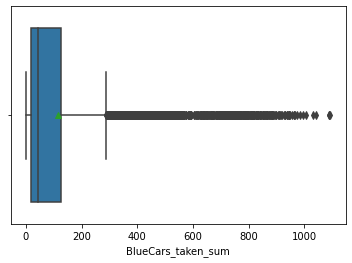

In [108]:
# Identifying outliers in the taken blue cars
sns.boxplot(df1["BlueCars_taken_sum"], showmeans=True)

In [66]:
#Removing the outliers in the dataset
df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape
df2

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
4,75001,1/5/2018,1440,4,weekday,114,117
7,75001,1/8/2018,1438,0,weekday,84,83
...,...,...,...,...,...,...,...
16077,95880,6/12/2018,1439,1,weekday,25,25
16078,95880,6/13/2018,1440,2,weekday,12,13
16079,95880,6/14/2018,1439,3,weekday,15,13
16080,95880,6/15/2018,1440,4,weekday,15,10


##UNIVARIATE ANALYSIS

In [68]:
#Frequency table of day type variable
df2.day_type.value_counts()

weekday    7970
Name: day_type, dtype: int64

In [69]:
#central tendency of n_daily_data_points 
print(df2['n_daily_data_points'].mean())
print(df2['n_daily_data_points'].mode())
print(df2['n_daily_data_points'].median())

1439.6429109159349
0    1440
dtype: int64
1440.0


In [70]:
#measures of dispersion of n_daily_data_points
print(df2['n_daily_data_points'].std())
print(df2['n_daily_data_points'].var())

print(df2['n_daily_data_points'].skew())
print(df2['n_daily_data_points'].kurt())

#The graph for age of respodents is left skewed and flat peaked.

0.5848426857636985
0.34204096709129617
-1.4124938874799395
0.9572158686833654


In [71]:
#central tendency of BlueCars_taken_sum 
print(df2['BlueCars_taken_sum'].mean())
print(df2['BlueCars_taken_sum'].mode())
print(df2['BlueCars_taken_sum'].median())

57.21355081555834
0    9
dtype: int64
34.0


In [72]:
#measures of dispersion of BlueCars_taken_sum
print(df2['BlueCars_taken_sum'].std())
print(df2['BlueCars_taken_sum'].var())

print(df2['BlueCars_taken_sum'].skew())
print(df2['BlueCars_taken_sum'].kurt())

61.78122799506112
3816.9201325777244
1.8235713422377098
2.918785455126641


In [73]:
#central tendency of BlueCars_returned_sum 
print(df2['BlueCars_returned_sum'].mean())
print(df2['BlueCars_returned_sum'].mode())
print(df2['BlueCars_returned_sum'].median())

57.2564617314931
0    12
dtype: int64
34.0


In [74]:
#measures of dispersion of BlueCars_returned_sum 
print(df2['BlueCars_returned_sum'].std())
print(df2['BlueCars_returned_sum'].var())

print(df2['BlueCars_returned_sum'].skew())
print(df2['BlueCars_returned_sum'].kurt())

61.24199932352005
3750.5824811420302
1.8220787322616805
2.9191177925127523


##BIVARIATE ANALYSIS

In [75]:
#Finding the relationship between and blue cars taken
df2['BlueCars_taken_sum'].corr(df2['dayOfWeek'])

#There is a weak correlation between the day of the week a car is taken 
#and the sum of blue cars taken

0.012272514004490047

In [51]:
#Finding the relationship between the number of blue cars taken vs number of cars returned
df2['BlueCars_taken_sum'].corr(df2['BlueCars_returned_sum'])

#There is a  very strong correlation between the number of blue cars taken and those returned.

0.9955660893020368

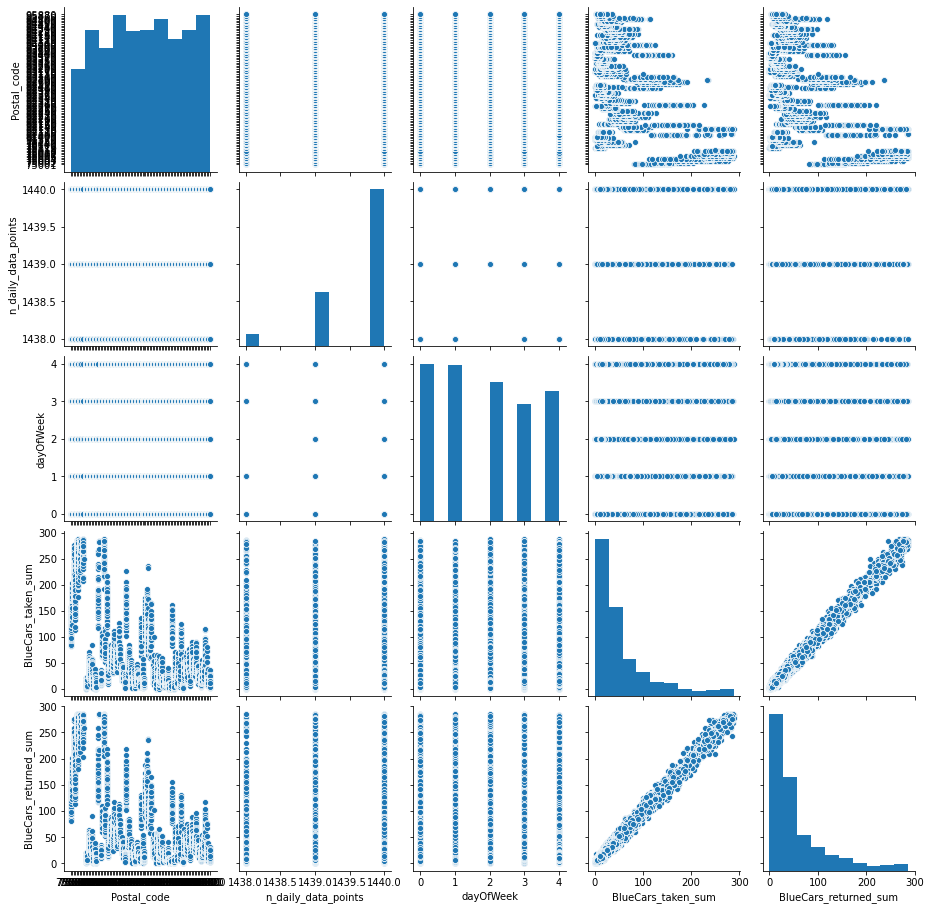

In [76]:
#Plotting a pair plot
sns.pairplot(df2)
plt.show()

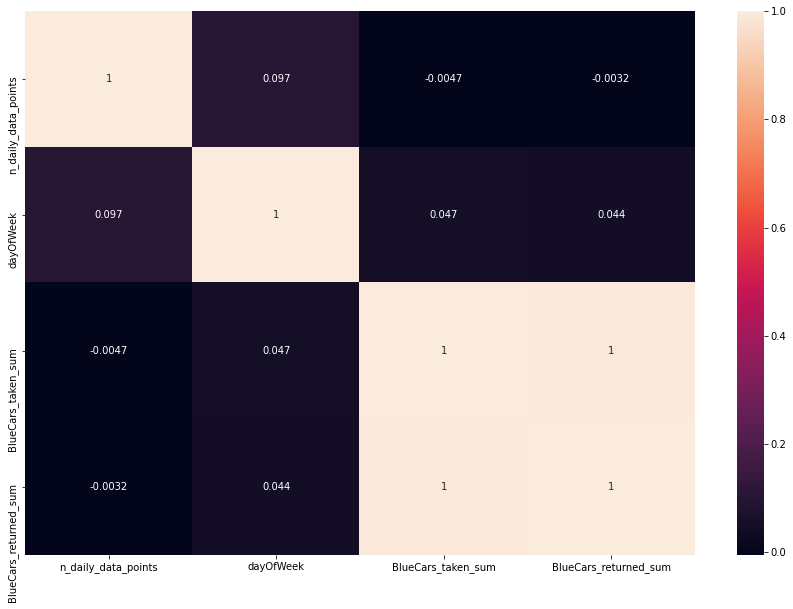

In [53]:
plt.subplots(figsize=(15,10))
sns.heatmap(df2.corr(),annot=True)
plt.show()

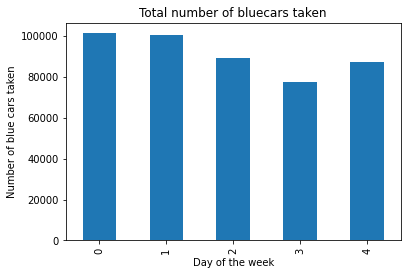

In [106]:
#Plotting a bar graph of the number of cars taken againt the day of the week(week day)
df2.groupby('dayOfWeek')['BlueCars_taken_sum'].sum().plot.bar()

plt.title("Total number of bluecars taken")
plt.ylabel('Number of blue cars taken')
plt.xlabel('Day of the week')
plt.show()

##SAMPLING


In [90]:
# Selecting the sample 
df2_sample = df2.sample(n = 2500, replace="False")
print(df2_sample.head())

      Postal_code       date  ...  BlueCars_taken_sum  BlueCars_returned_sum
13420       94110   6/6/2018  ...                  38                     34
12105       93400  3/14/2018  ...                 110                    119
3177        75112   3/2/2018  ...                   8                      8
13755       94140  1/10/2018  ...                  37                     45
5050        92130   3/6/2018  ...                 270                    263

[5 rows x 7 columns]


In [91]:
df2_sample.head()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
13420,94110,6/6/2018,1440,2,weekday,38,34
12105,93400,3/14/2018,1440,2,weekday,110,119
3177,75112,3/2/2018,1440,4,weekday,8,8
13755,94140,1/10/2018,1440,2,weekday,37,45
5050,92130,3/6/2018,1439,1,weekday,270,263


In [92]:
#central tendency of BlueCars_taken_sum in the sample
blue_mean=df2_sample['BlueCars_taken_sum'].mean()
blue_mode=df2_sample['BlueCars_taken_sum'].mode()
blue_median=df2_sample['BlueCars_taken_sum'].median()

print(blue_mean)
print(blue_mode)
print(blue_median)

58.216
0    9
dtype: int64
35.0


In [93]:
#measures of dispersion of BlueCars_taken_sum
blue_std=df2_sample['BlueCars_taken_sum'].std()
blue_var=df2_sample['BlueCars_taken_sum'].var()

print(df2_sample['BlueCars_taken_sum'].skew())
print(df2_sample['BlueCars_taken_sum'].kurt())

print(blue_std)

1.7844000890142906
2.7024306274855556
62.74167316083004


##HYPOTHESIS TESTING

In [111]:
#Null hyothesis: the mean total number of blue cars taken from a station is not equal in the ddifferent days of the weekday
#Alternative hypothesis : the mean total number of blue cars taken from a postal code is not equal in the different days of the week
#Calculating using the z score formula as the sample is mor than 30
#z = (x – μ) / (σ / √n)
# x= population mean
pop_mean=df2['BlueCars_returned_sum'].mean()
# μ= sample mean
sample_mean=df2_sample['BlueCars_taken_sum'].mean()
# σ=standard deviation
pop_std=df2['BlueCars_taken_sum'].std()
# √n= represents the square root of the number of the samples
n= math.sqrt(2500)
#Calculating the z score
zscore = ( pop_mean - sample_mean ) /( pop_std/ n)
print('The z-score is',zscore)



The z-score is -0.7765613436686714


In [112]:
#calculating the p value/probability
from scipy.stats import norm
prob =  stats.norm.cdf(zscore)
print(prob)

#interpretation of the p value when the significance value is 0.05
if prob < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we fail to reject null hypothesis")

0.21870880784301017
we fail to reject null hypothesis


In [113]:
#confidence level
from scipy.stats import norm
prob = 1 - stats.norm.cdf(zscore)
prob

0.7812911921569898

In [115]:
taken = df2_sample['BlueCars_taken_sum']
taken.mean()

58.216

In [126]:
#Finding the point estiamte.  
sample_taken = np.random.choice(a= taken,
                               size=1000)            # Sample 2500 values

print ( sample_taken.mean() )                         # Show sample mean

taken.mean() - sample_taken.mean()

57.956


0.259999999999998

In [104]:
#Confidence interval
# Calculating the sample mean of final data
#
sample_mean=df2_sample['BlueCars_taken_sum'].mean()
sample_mean

# Finding the sample size
#
sample_size = df2_sample['BlueCars_taken_sum'].shape[0]
sample_size

# Finding the standard error of the mean of data 
#
std_error = df2_sample['BlueCars_taken_sum'].std() / np.sqrt(sample_size)
std_error

# Calculating the 95% Confidence Interval for mean data 
# To calculate the confidence interval, we will use the norm object from the statssubpackage. 
# The norm object has an interval() method that receives three inputs 
# – our chosen confidence interval 0.95, and the sample mean and standard error of the mean.  
# 
stats.norm.interval(0.95, loc=sample_mean, scale=std_error)

# We can be 95% certain that the population mean data is between 55.75 and 60.67

(55.7565716054998, 60.6754283945002)